In [ ]:
%pip install pandas
%pip install Matplotlib
%pip install Seaborn
%pip install scikit-learn
%pip install scipy 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
from sklearn.metrics import mean_squared_error

# Traffic Flow and AQHI

In [ ]:
# Reading data from 2021-2022_AQHI_daily_average.xlsx
excel_file = pd.ExcelFile('Finalized_data/2021-2022_AQHI_daily_average.xlsx')


df = pd.read_excel(excel_file, sheet_name='Sheet1', usecols='B:R')

district_list = ['Central/Western', 'Southern', 'Eastern', 'North', 'Causeway Bay', 'Central', 'Sha Tin', 'Tai Po', 'Tsuen Wan', 'Kwai Chung', 'Kwun Tong', 'Tseung Kwan O', 'Mong Kok', 'Sham Shui Po', 'Tung Chung', 'Yuen Long', 'Tuen Mun']
data_2021AQHI = df.iloc[24].tolist()
data_2022AQHI = df.iloc[25].tolist()
data_car = df.iloc[27].tolist()
bar_width = 0.35
fig, ax = plt.subplots(figsize=(24, 8))

ax.bar(np.arange(len(district_list)), data_2021AQHI, width=bar_width, label='2021')

# Create the second bar chart
ax.bar(np.arange(len(district_list)) + bar_width, data_2022AQHI, width=bar_width, label='2022')

# Set the x-axis tick labels to the category names
ax.set_xticks(np.arange(len(district_list)))
ax.set_xticklabels(district_list)

ax.set_xlabel('District')
ax.set_ylabel('Anunal Daily Average AQHI')
plt.title('Anunal Daily Average AQHI by District in Hong Kong, 2021&2022')

ax.legend()
plt.show()

FileNotFoundError: ignored

In [ ]:
# Correlation graph

# Calculate the correlation coefficient
correlation = np.corrcoef(data_car, data_2021AQHI)[0,1]

# Calculate the correlation coefficient and draw the line
slope, intercept = np.polyfit(data_car, data_2021AQHI, 1)
line = slope * np.array(data_car) + intercept

fig, ax = plt.subplots()
ax.scatter(data_car, data_2021AQHI)

# Add the correlation coefficient to the plot
textstr = f'Correlation = {correlation:.2f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
ax.plot(data_car, line, color='red')


plt.title("Relationship between Annual Daily Average Traffic and AQHI")
ax.set_xlabel('Annual Daily Average Traffic (Cars) ')
ax.set_ylabel('Annual Daily Average AQHI')

plt.show()

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-value: {r_value:.2f}")

NameError: ignored

Traffic Flow by Districts

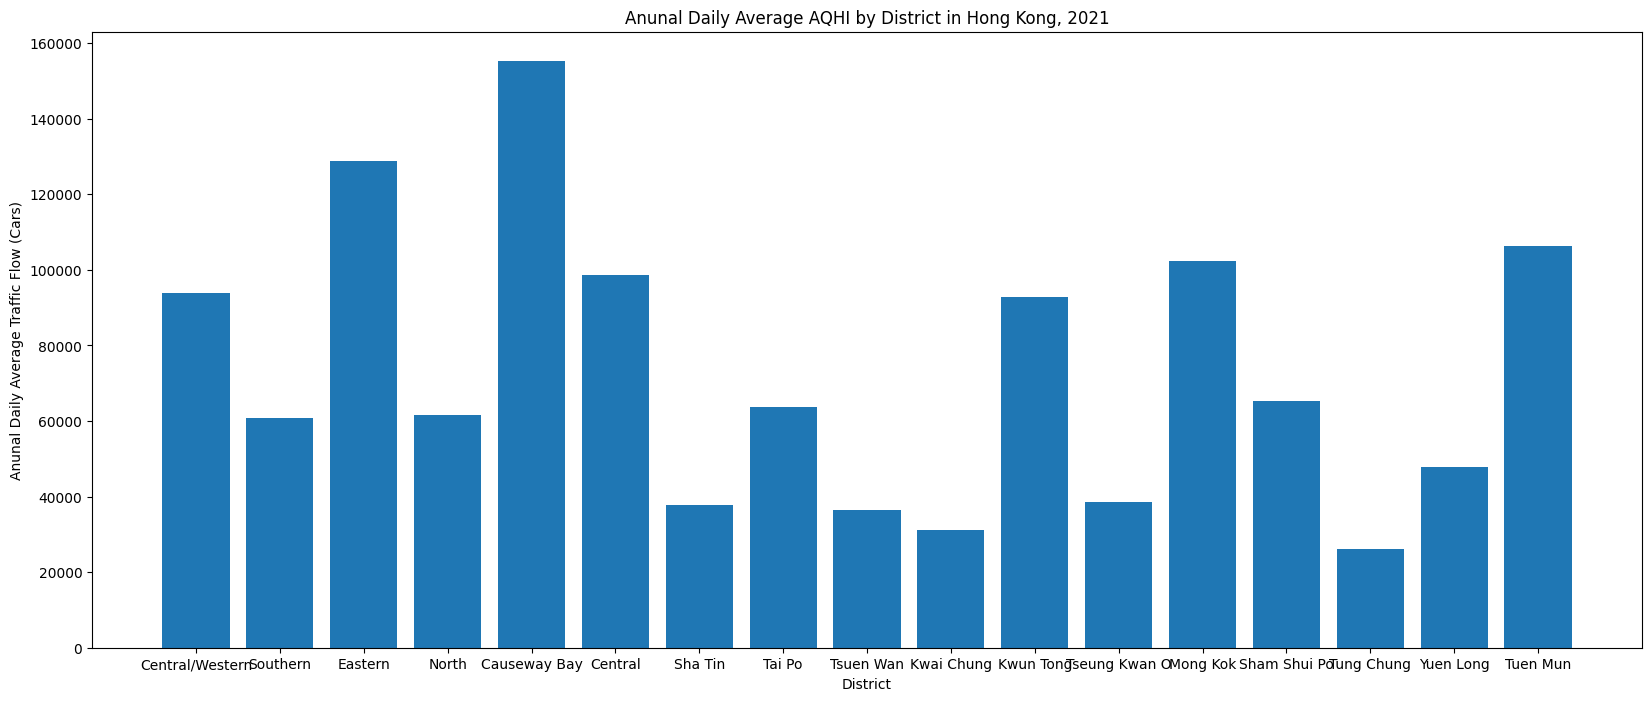

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar( district_list, data_car )
ax.set_xlabel('District')
ax.set_ylabel('Anunal Daily Average Traffic Flow (Cars)')
plt.title('Anunal Daily Average AQHI by District in Hong Kong, 2021')

plt.show()

# Air pollutants PM2.5 and AQHI

Slope is  0.09027721495327101
Slope is  0.14052363744075833
Slope is  0.10323798895899054
Slope is  0.10422611877828052
Slope is  0.09549084294034947
Slope is  0.10190026393188853
Slope is  0.09657787987679671
Slope is  0.08928473980424143
Slope is  0.09201387612387615
Slope is  0.11036205910882087
Slope is  0.1231219164882227
Slope is  0.14561953030303032
Slope is  0.08875468361115696
Slope is  0.11395578271308526
Slope is  0.0668152343809645
Slope is  0.0761717342007435
Slope is  0.07126025240384615


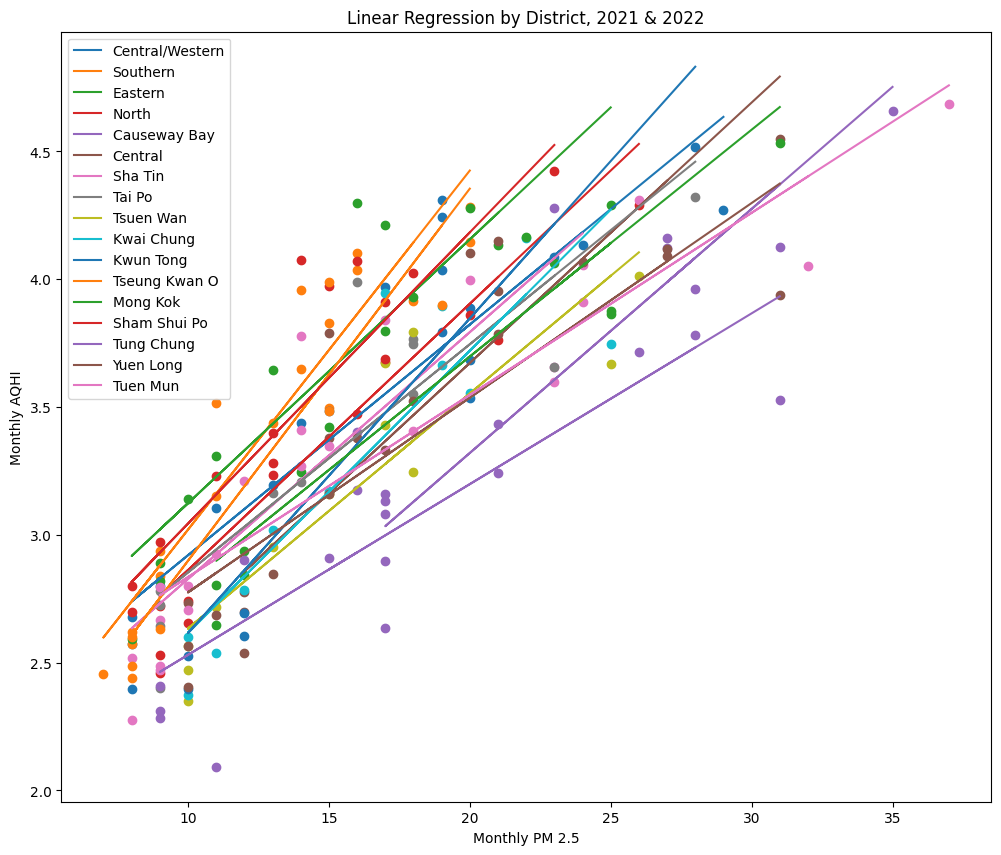

In [ ]:
# Reading data from 2021-2022_AQHI_daily_average.xlsx
excel_file = pd.ExcelFile('Finalized_data/2021-2022_AQHI_daily_average.xlsx')

district_list = ['Central/Western', 'Southern', 'Eastern', 'North', 'Causeway Bay', 'Central', 'Sha Tin', 'Tai Po', 'Tsuen Wan', 'Kwai Chung', 'Kwun Tong', 'Tseung Kwan O', 'Mong Kok', 'Sham Shui Po', 'Tung Chung', 'Yuen Long', 'Tuen Mun']
df_AQHI = pd.read_excel(excel_file, sheet_name='Sheet1', usecols='B:R', nrows=12 )

df_pm25 = pd.read_excel(excel_file, sheet_name='Sheet1', usecols='B:R',skiprows = 50, nrows=12, names = district_list)
df_NO2 =  pd.read_excel(excel_file, sheet_name='Sheet1', usecols='B:R',skiprows = 77, nrows=24, names = district_list)

# Liner regression function 
def linear_reg(x , y):
  slope, intercept, r_value, p_value, std_err = linregress(x, y)
  regression_line = intercept + slope * np.array(x)
  print("Slope is ", slope)
  return regression_line

def correlation(x, y):
  correlation = np.corrcoef(x, y)[0, 1]
  return correlation


AQHI_list = [df_AQHI[column_name].tolist() for column_name in df_AQHI.columns]
pm25_list = [df_pm25[column_name].tolist() for column_name in df_pm25.columns]

fig,ax= plt.subplots(figsize=(12, 10))


for i in range(17):
  ax.scatter(pm25_list[i], AQHI_list[i], )
  ax.plot(pm25_list[i], linear_reg(pm25_list[i], AQHI_list[i]),label=district_list[i] )
  ax.legend()

plt.title("Linear Regression by District, 2021 & 2022")
plt.xlabel("Monthly PM 2.5")
plt.ylabel("Monthly AQHI")

plt.show()


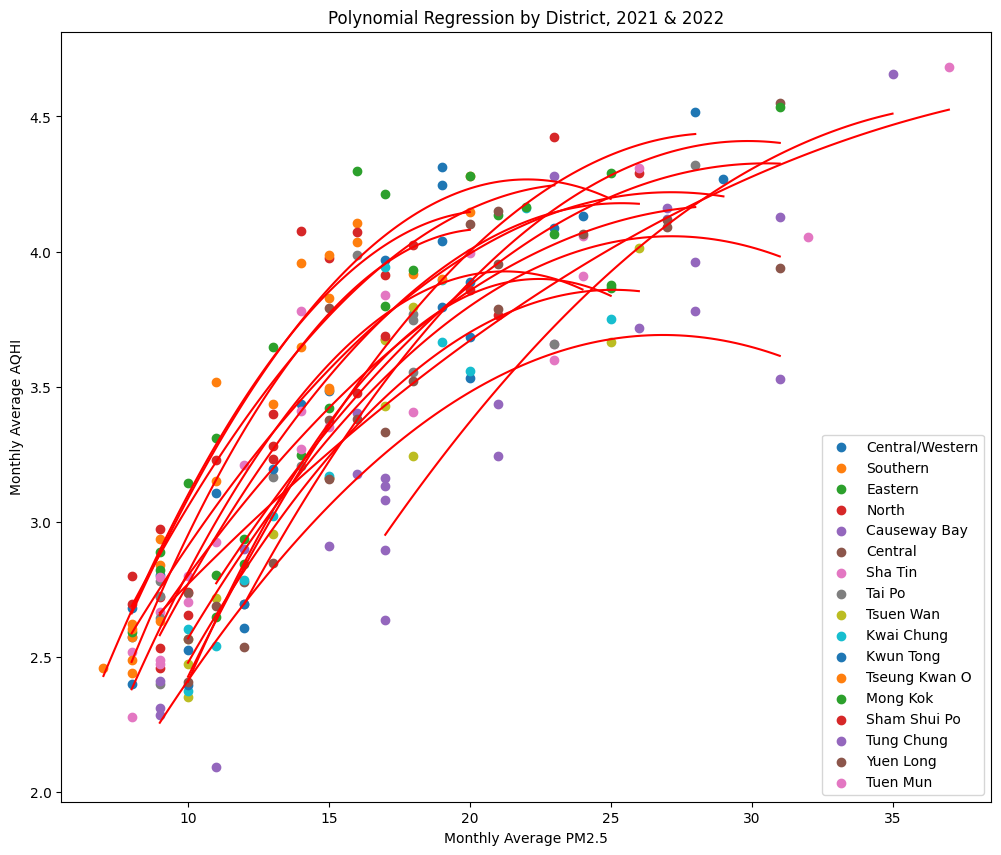

In [ ]:
# Fit a polynomial regression model

fig, ax = plt.subplots(figsize=(12, 10))
# Create a scatter plot of the data
for column_name in df_AQHI.columns:
  x = df_pm25[column_name]
  y = df_AQHI[column_name]

  degree = 2
  p = np.polyfit(x, y, degree)

  ax.scatter(x, y, label= column_name )
# Create a polynomial function based on the model coefficients
  poly_func = np.poly1d(p)

# Create a line plot of the polynomial function
  x_vals = np.linspace(x.min(), x.max(), 100)
  y_vals = poly_func(x_vals)
  ax.plot(x_vals, y_vals, color='red')
  ax.legend()


ax.set_title('Polynomial Regression by District, 2021 & 2022')
ax.set_xlabel('Monthly Average PM2.5')
ax.set_ylabel('Monthly Average AQHI')


plt.show()


Mean Square Error by Linear Regression


[31, 21, 21, 20, 12, 13, 12, 12, 15, 15, 21, 27]
[4.548387, 3.953869, 3.78629, 4.102778, 2.776882, 2.848611, 2.696237, 2.537634, 3.1625, 3.377688, 4.148611, 4.091398]


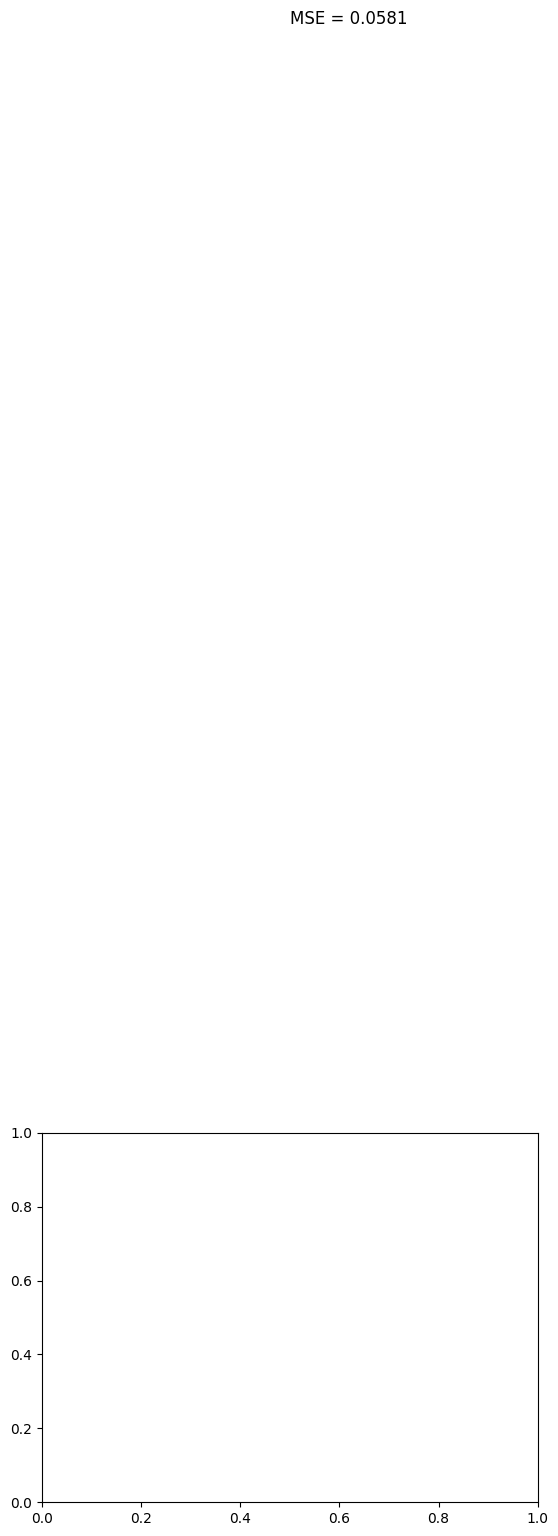

Slope: 0.10190026393188849
Mean Squared Error: 0.05809526154340964


In [ ]:
x = df_pm25['Central'].tolist()
y = df_AQHI['Central'].tolist()
slope_range = np.linspace(0, 4, 20)

# Calculate the slope of the regression line
p = np.polyfit(x, y, 1)
slope = p[0]

# Calculate the mean squared error
y_pred = np.polyval(p, x)
mse = mean_squared_error(y, y_pred)
plt.text(0.5, 4, f"MSE = {mse:.4f}", fontsize=12)

plt.show()
print("Slope:", slope)
print("Mean Squared Error:", mse)

Mean Square Error by Polynomial Regression

Mean squared error: 0.02256783959856462


[]

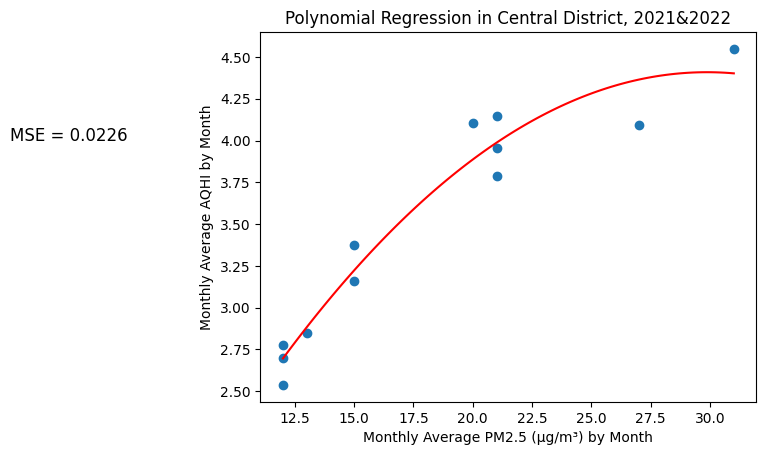

In [ ]:
x = df_pm25['Central']
y = df_AQHI['Central']

degree = 2
p = np.polyfit(x, y, degree)

plt.scatter(x, y)
# Create a polynomial function based on the model coefficients
poly_func = np.poly1d(p)

# Create a line plot of the polynomial function

x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = poly_func(x_vals)
plt.plot(x_vals, y_vals, color='red')

# Mean square error of this polynomial regression
y_pred = poly_func(x)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
plt.text(0.5, 4, f"MSE = {mse:.4f}", fontsize=12, )

plt.title('Polynomial Regression in Central District, 2021&2022')
plt.xlabel('Monthly Average PM2.5 (µg/m³) by Month')
plt.ylabel('Monthly Average AQHI by Month')
plt.plot()

# Population and AQHI


Population Density

---



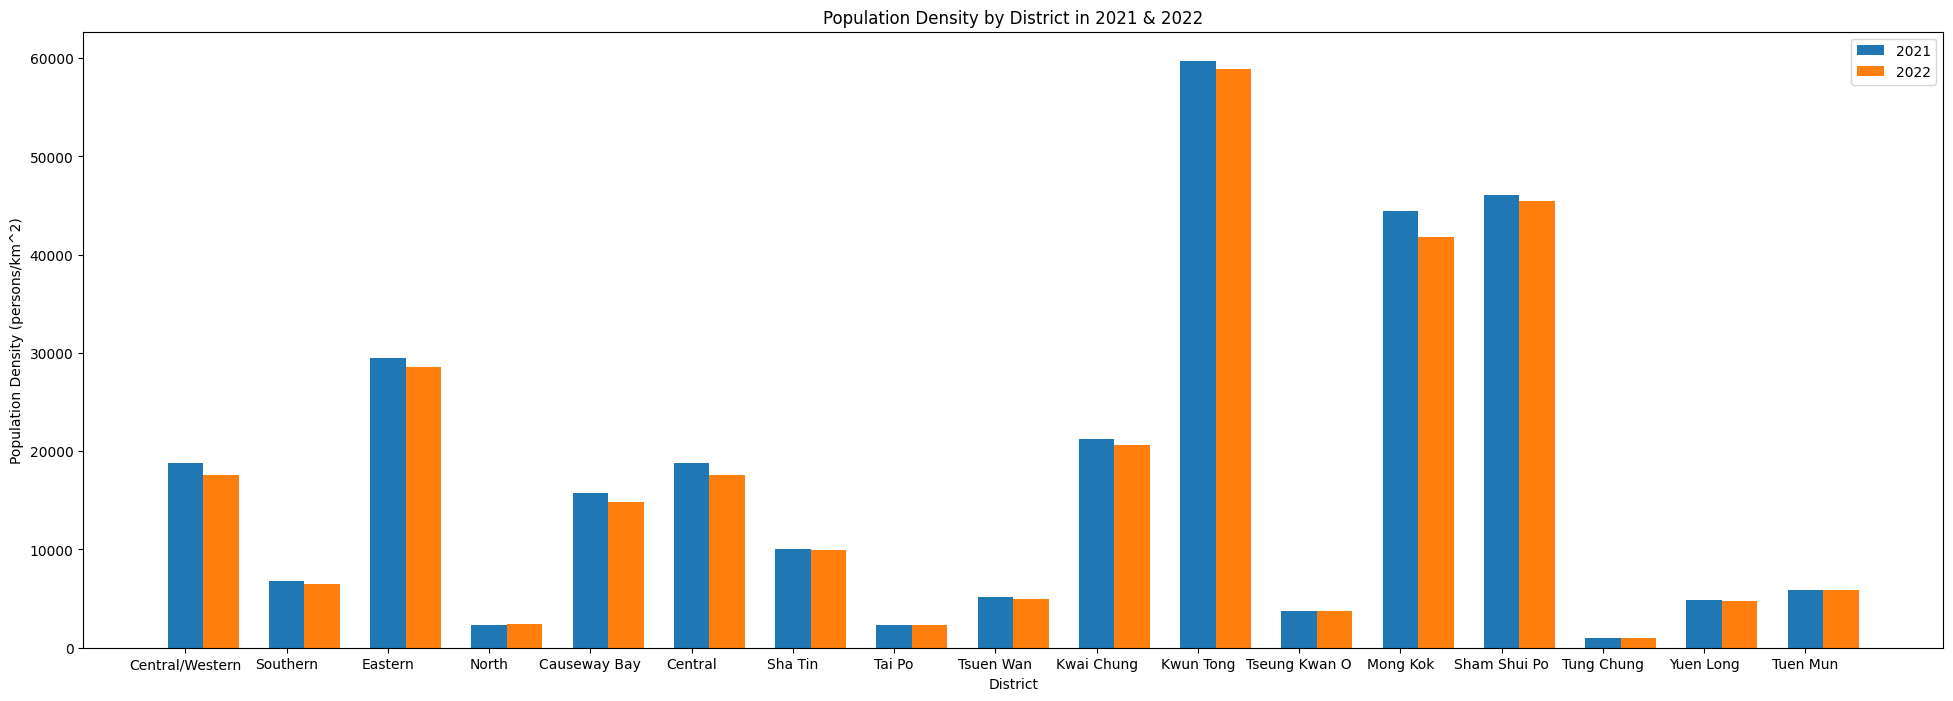

In [ ]:
# Reading data from population20212022.xlsx
excel_file = pd.ExcelFile('Finalized_data/population20212022.xlsx')
district_list = ['Central/Western', 'Southern', 'Eastern', 'North', 'Causeway Bay', 'Central', 'Sha Tin', 'Tai Po', 'Tsuen Wan', 'Kwai Chung', 'Kwun Tong', 'Tseung Kwan O', 'Mong Kok', 'Sham Shui Po', 'Tung Chung', 'Yuen Long', 'Tuen Mun']
df_population = pd.read_excel(excel_file, usecols='B:R', nrows=2, names = district_list )

population_2021 = df_population.iloc[0].tolist()
population_2022 = df_population.iloc[1].tolist()

bar_width = 0.35
fig, ax = plt.subplots(figsize=(24, 8))

ax.bar(np.arange(len(district_list)), population_2021, width=bar_width, label='2021')

# Create the second bar chart
ax.bar(np.arange(len(district_list)) + bar_width, population_2022, width=bar_width, label='2022')

# Set the x-axis tick labels to the category names
ax.set_xticks(np.arange(len(district_list)))
ax.set_xticklabels(district_list)

ax.set_xlabel('District')
ax.set_ylabel('Population Density (persons/km^2)')
plt.title('Population Density by District in 2021 & 2022')

ax.legend()
plt.show()

2021 Population and AQHI Correlation

In [ ]:

# Correlation graph

# Calculate the correlation coefficient
correlation = np.corrcoef(population_2021, data_2021AQHI)[0,1]

# Calculate the correlation coefficient and draw the line
slope, intercept = np.polyfit(population_2021, data_2021AQHI, 1)
line = slope * np.array(population_2021) + intercept

fig, ax = plt.subplots()
ax.scatter(population_2021, data_2021AQHI)

# Add the correlation coefficient to the plot
textstr = f'Correlation = {correlation:.2f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.plot(population_2021, line, color='red')
plt.title("Relationship between Population Density and Annual Average AQHI in 2021")
plt.xlabel("Population Density (persons/km^2)")
plt.ylabel("Annual Average AQHI")

plt.show()
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")



2022 Population and AQHI Correlation

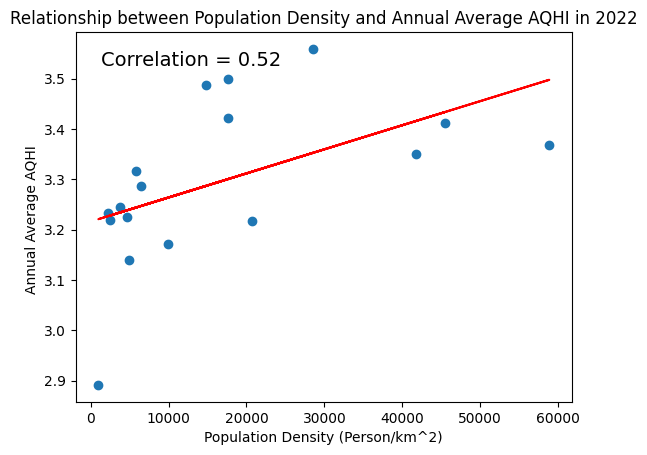

In [ ]:
# Calculate the correlation coefficient
correlation = np.corrcoef(population_2022, data_2022AQHI)[0,1]

# Calculate the correlation coefficient and draw the line
slope, intercept = np.polyfit(population_2022, data_2022AQHI, 1)
line = slope * np.array(population_2022) + intercept

fig, ax = plt.subplots()
ax.scatter(population_2022, data_2022AQHI)


textstr = f'Correlation = {correlation:.2f}'
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
ax.plot(population_2022, line, color='red')

ax.set_title('Relationship between Population Density and Annual Average AQHI in 2022')
ax.set_xlabel('Population Density (Person/km^2)')
ax.set_ylabel('Annual Average AQHI ')


plt.show()

# Monthly Daily Average AQHI of All District



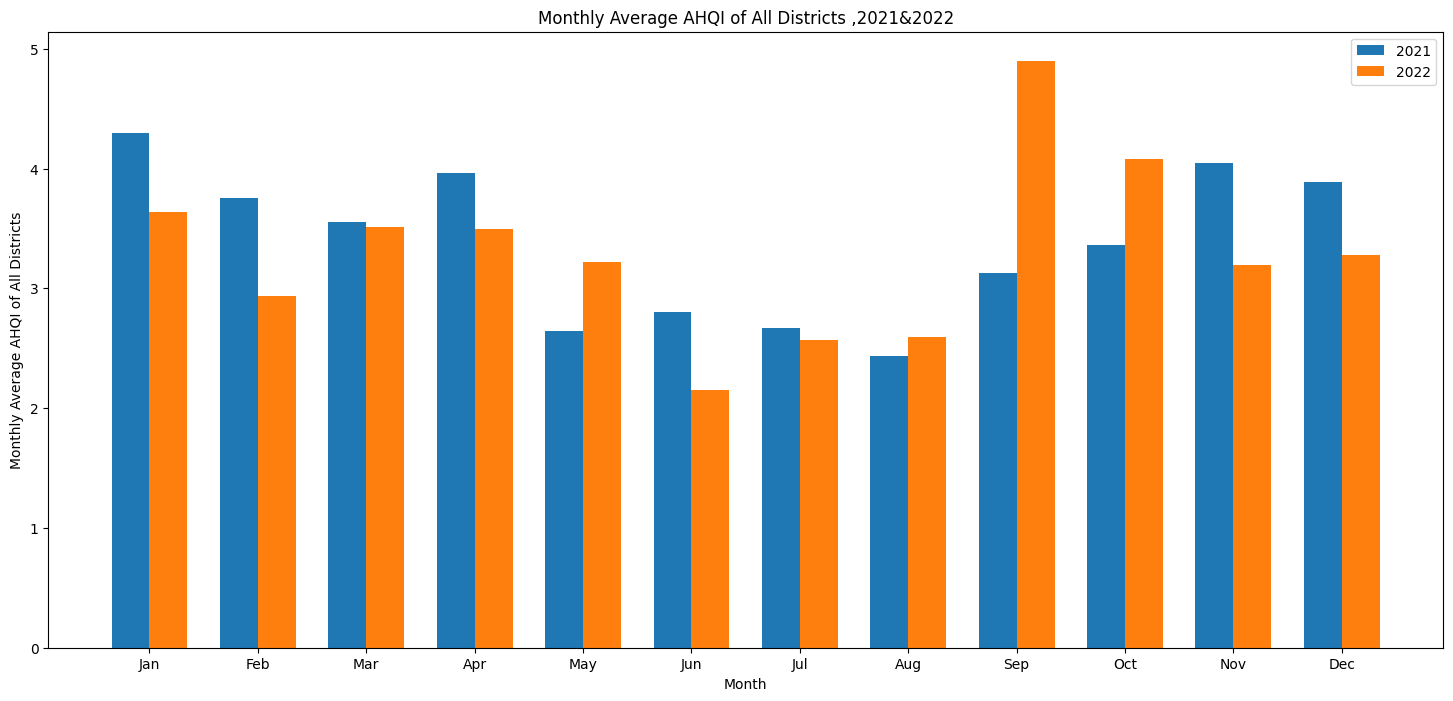

In [ ]:
import calendar
excel_file = pd.ExcelFile('Finalized_data/2021-2022_AQHI_daily_average.xlsx')
mon_avg_AQHI = pd.read_excel(excel_file, usecols= 'V', nrows = 24 )
mon_avg_AQHI = mon_avg_AQHI['Monthly avg'].tolist()
month_list = [calendar.month_name[i][:3] for i in range(1, 13)]
bar_width = 0.35
fig, ax = plt.subplots(figsize=(18, 8))

# Create the first bar chart for year 2021
ax.bar(np.arange(12), mon_avg_AQHI[:12], width=bar_width, label='2021')

# Create the second bar chart for year 2022
ax.bar(np.arange(12) + bar_width, mon_avg_AQHI[12:24], width=bar_width, label='2022')

ax.set_xticks(np.arange(12) + bar_width / 2)
ax.set_xticklabels(month_list)

ax.set_xlabel('Month')
ax.set_ylabel('Monthly Average AHQI of All Districts')
plt.title('Monthly Average AHQI of All Districts ,2021&2022')

ax.legend()

plt.show()


# AQHI Linear Regression


In [ ]:
import calendar

excel_file = pd.ExcelFile('Finalized_data/2021-2022_AQHI_daily_average.xlsx')
mon_avg_AQHI = pd.read_excel(excel_file, usecols= 'V', nrows = 24 )
mon_avg_AQHI = mon_avg_AQHI['Monthly avg'].tolist()
month_list = [calendar.month_name[i][:3] for i in range(1, 13)]

aqhi_2021 = mon_avg_AQHI[:12]
aqhi_2022 = mon_avg_AQHI[12:24]

# Create a scatter plot of AQHI values against month, with different colors for the two years
plt.scatter(month_list,mon_avg_AQHI[0:12] , color='blue', label='2021')
plt.scatter(month_list,mon_avg_AQHI[12:24], color='red', label='2022')


coeffs = np.polyfit(month_list, mon_avg_AQHI[12:24], 2)
reg_line = np.polyval(coeffs, month_list)

# Plot the regression line
plt.plot( month_list , reg_line, color='green', label='Regression')


plt.xlabel('Month')
plt.ylabel('AQHI')


plt.legend()
plt.show()

KeyError: ignored

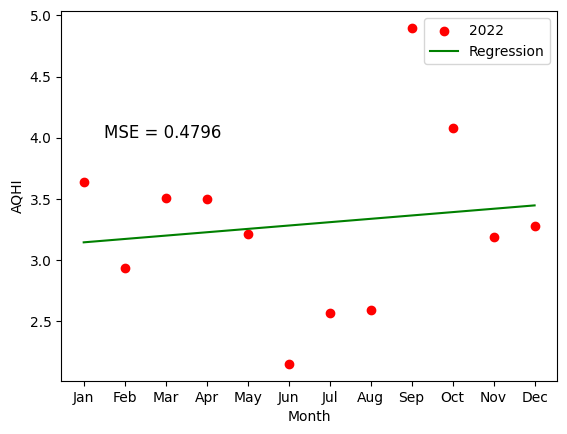

In [ ]:
import calendar
excel_file = pd.ExcelFile('Finalized_data/2021-2022_AQHI_daily_average.xlsx')
mon_avg_AQHI = pd.read_excel(excel_file, usecols= 'V', nrows = 24 )
mon_avg_AQHI = mon_avg_AQHI['Monthly avg'].tolist()
month_list = [calendar.month_name[i][:3] for i in range(1, 13)]

aqhi_2021 = mon_avg_AQHI[:12]
aqhi_2022 = mon_avg_AQHI[12:24]
y=mon_avg_AQHI[12:24]
x=[1,2,3,4,5,6,7,8,9,10,11,12]
# Create a scatter plot of AQHI values against month, with different colors for the two years

plt.scatter(month_list,mon_avg_AQHI[12:24], color='red', label='2022')


coeffs = np.polyfit(x, y, 1)
reg_line = np.polyval(coeffs, x)

# Plot the regression line
plt.plot( month_list , reg_line, color='green', label='Regression')

plt.xlabel('Month')
plt.ylabel('AQHI')


plt.legend()
mse = mean_squared_error(y, reg_line)
plt.text(0.5, 4.5, f"MSE = {mse:.4f}", fontsize=12, )

plt.show()

AttributeError: ignored

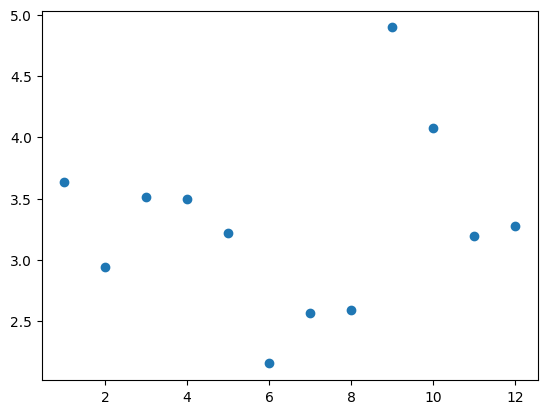

In [ ]:
import calendar

excel_file = pd.ExcelFile('Finalized_data/2021-2022_AQHI_daily_average.xlsx')
mon_avg_AQHI = pd.read_excel(excel_file, usecols= 'V', nrows = 24 )
mon_avg_AQHI = mon_avg_AQHI['Monthly avg'].tolist()
month_list = [calendar.month_name[i][:3] for i in range(1, 13)]

aqhi_2021 = mon_avg_AQHI[:12]
aqhi_2022 = mon_avg_AQHI[12:24]
y=mon_avg_AQHI[12:24]
x=[1,2,3,4,5,6,7,8,9,10,11,12]
degree = 2
p = np.polyfit(x, y, degree)

plt.scatter(x, y)
# Create a polynomial function based on the model coefficients
poly_func = np.poly1d(p)

# Create a line plot of the polynomial function

x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = poly_func(x_vals)
plt.plot(x_vals, y_vals, color='red')

# Mean square error of this polynomial regression
y_pred = poly_func(x)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)
plt.text(0.5, 4, f"MSE = {mse:.4f}", fontsize=12, )

plt.show()
